# Teaching Demo: Evaluating Machine Learning Models with scikit-learn

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# We use breast cancer dataset as an example
breast = load_breast_cancer()
# Create features (X) and target (y) as data frames
X = pd.DataFrame(breast.data, columns=breast.feature_names)
y = pd.Series(breast.target)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)
print (X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [68]:
y.value_counts()

1    357
0    212
dtype: int64

In [69]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [70]:
# Build and train models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=111)
dt = DecisionTreeClassifier(random_state=111)

knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

print ('Done!')

Done!


## Method 1: Accuracy

In [71]:
# Print the accuracy
print('Accuracy: ')
print('K-Nearest Neighbors: ' + '{:.2%}'.format(knn.score(X_test, y_test)))
print('Logistic Regression: ' + '{:.2%}'.format(lr.score(X_test, y_test)))
print('Decision Tree: ' + '{:.2%}'.format(dt.score(X_test, y_test)))

Accuracy: 
K-Nearest Neighbors: 93.01%
Logistic Regression: 93.01%
Decision Tree: 89.51%


In [72]:
# Check with training set accuracy
print('Accuracy (training): ')
print('K-Nearest Neighbors: ' + '{:.2%}'.format(knn.score(X_train, y_train)))
print('Logistic Regression: ' + '{:.2%}'.format(lr.score(X_train, y_train)))
print('Decision Tree: ' + '{:.2%}'.format(dt.score(X_train, y_train)))

Accuracy (training): 
K-Nearest Neighbors: 95.07%
Logistic Regression: 96.71%
Decision Tree: 100.00%


## Method 2: Confusion Matrix, Precision, Recall and F-1 score

In [73]:
from sklearn.metrics import f1_score

# K Nearest Neighbor
print ('F-1 score: ')
y_pred_knn = knn.predict(X_test)
print ('K-Nearest Neighbors: ' + '{:.3f}'.format(f1_score(y_test, y_pred_knn)))
y_pred_lr = lr.predict(X_test)
print ('Logistic Regression: ' + '{:.3f}'.format(f1_score(y_test, y_pred_lr)))
y_pred_dt = dt.predict(X_test)
print ('Decision Tree: ' + '{:.3f}'.format(f1_score(y_test, y_pred_dt)))

F-1 score: 
K-Nearest Neighbors: 0.948
Logistic Regression: 0.947
Decision Tree: 0.919


In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Confusion matrix
# Logistic Regression
print(confusion_matrix(y_test, y_pred_lr))

[[43  6]
 [ 4 90]]


In [75]:
# Classification report
# K-Nearest Neighbors
print(classification_report(y_test, y_pred_knn))

             precision    recall  f1-score   support

          0       0.95      0.84      0.89        49
          1       0.92      0.98      0.95        94

avg / total       0.93      0.93      0.93       143



## Method 3: ROC curve and AUC

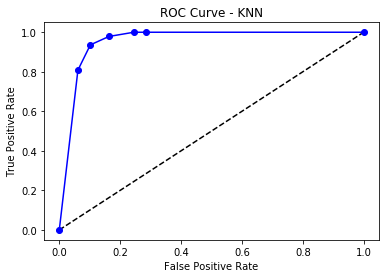

AUC for K-Nearest Neighbors: 0.955


In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Use predict_proba to return probability predictions
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'bo-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.show()
print("AUC for K-Nearest Neighbors: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_knn)))

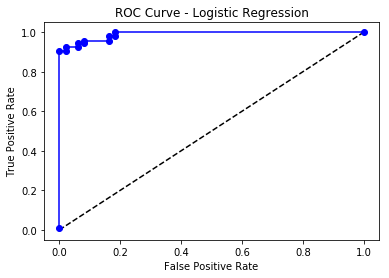

AUC for Logistic Regression: 0.990


In [77]:
y_pred_prob_lr = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'bo-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()
print("AUC for Logistic Regression: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_lr)))

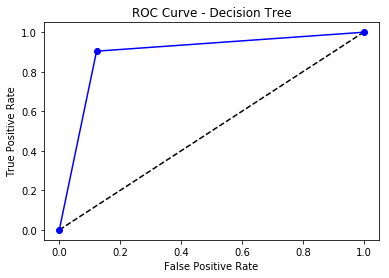

AUC for Decision Tree: 0.891


In [78]:
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'bo-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.show()
print("AUC for Decision Tree: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_dt)))

In [79]:
# Check - Use training set
print ('AUC with training set: ')
y_pred_prob_knn_tr = knn.predict_proba(X_train)[:,1]
y_pred_prob_lr_tr = lr.predict_proba(X_train)[:,1]
y_pred_prob_dt_tr = dt.predict_proba(X_train)[:,1]
print("K-Nearest Neighbors: {:.3f}".format(roc_auc_score(y_train, y_pred_prob_knn_tr)))
print("Logistic Regression: {:.3f}".format(roc_auc_score(y_train, y_pred_prob_lr_tr)))
print("Decision Tree: {:.3f}".format(roc_auc_score(y_train, y_pred_prob_dt_tr)))

AUC with training set: 
K-Nearest Neighbors: 0.992
Logistic Regression: 0.996
Decision Tree: 1.000


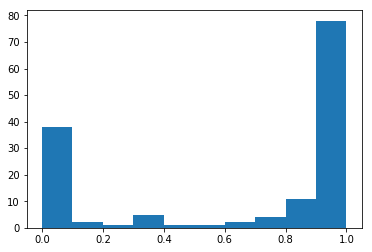

In [80]:
# Plot histogram of probability prediction
# Logistic Regression
plt.hist(y_pred_prob_lr);

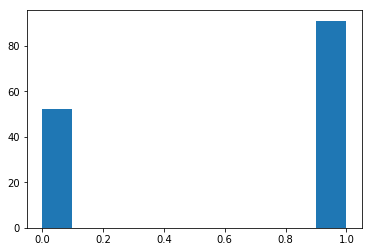

In [81]:
# Decision Tree
plt.hist(y_pred_prob_dt);

## Method 4: Error Inspection

In [82]:
# Create a dataframe with features, true label and prediction
# Use Logistic Regression prediction as example
X_test2 = X_test.copy()
X_test2['Label'] = y_test
X_test2['Prediction'] = y_pred_lr

In [83]:
X_test2[y_test != y_pred_lr]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,Prediction
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,108.40,808.9,0.13060,0.1976,0.3349,0.12250,0.3020,0.06846,0,1
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,110.30,812.4,0.14110,0.3542,0.2779,0.13830,0.2589,0.10300,0,1
290,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,...,101.70,767.3,0.09983,0.2472,0.2220,0.10210,0.2272,0.08799,1,0
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,92.04,653.6,0.14190,0.1523,0.2177,0.09331,0.2829,0.08067,0,1
413,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,...,110.20,867.1,0.10770,0.3345,0.3114,0.13080,0.3163,0.09251,1,0
536,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,0.05982,...,104.30,728.3,0.13800,0.2733,0.4234,0.13620,0.2698,0.08351,0,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,107.30,740.4,0.16100,0.4225,0.5030,0.22580,0.2807,0.10710,0,1
541,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,113.50,808.9,0.13400,0.4202,0.4040,0.12050,0.3187,0.10230,1,0
146,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,91.93,591.7,0.13850,0.4092,0.4504,0.18650,0.5774,0.10300,0,1
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,112.10,828.5,0.11530,0.3429,0.2512,0.13390,0.2534,0.07858,1,0
